## Initialisations

In [ ]:
# initialisations
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, ttest_rel
import random
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [ ]:
sns.set(
    palette="Paired",
    #style='whitegrid',
    color_codes=True,
    rc={"figure.figsize": (12,8)},
)

In [ ]:
url='https://drive.google.com/file/d/1XN0P7t7koCNMcpFDTdhWQAQpv_G6yf6C/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
bank_df = pd.read_csv(url, sep=';')
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
import os
import warnings
from plotly.subplots import make_subplots
import pickle
import plotly.graph_objects as go
import plotly.express as px
from sklearn import svm
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from math import sqrt
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

## Preprocessing

In [ ]:
bank_df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
for col in bank_df:
    print(col)
    print(bank_df[col].unique())

age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
duration
[ 261  149  226 ... 1246 1556 1868]
campaign
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
pdays
[999

In [ ]:
for col in bank_df:
    print(col)
    print(bank_df[col].nunique())

age
78
job
12
marital
4
education
8
default
3
housing
3
loan
3
contact
2
month
10
day_of_week
5
duration
1544
campaign
42
pdays
27
previous
8
poutcome
3
emp.var.rate
10
cons.price.idx
26
cons.conf.idx
26
euribor3m
316
nr.employed
11
y
2


In [ ]:
bank_df.shape[0]

41188

In [ ]:
for col in bank_df:
    bank_df = bank_df[bank_df[col] != 'unknown']

In [ ]:
bank_df['marital'].unique() 

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
bank_df.shape[0]

30488

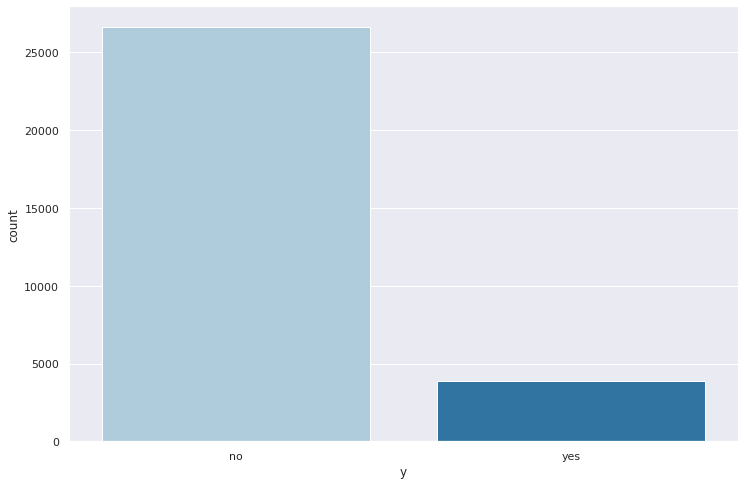

In [ ]:
sns.countplot(data=bank_df,x='y')

In [ ]:
bank_df.y.value_counts()

no     26629
yes     3859
Name: y, dtype: int64

Label Encoder

What is a label encoder? Image result for label encoder Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering

In [ ]:
le = LabelEncoder()
bank_df.job = le.fit_transform(bank_df.job)
bank_df.marital = le.fit_transform(bank_df.marital)
bank_df.education = le.fit_transform(bank_df.education)
bank_df.default = le.fit_transform(bank_df.default)
bank_df.housing = le.fit_transform(bank_df.housing)
bank_df.loan = le.fit_transform(bank_df.loan)
bank_df.contact = le.fit_transform(bank_df.contact)
bank_df.month = le.fit_transform(bank_df.month)
bank_df.day_of_week = le.fit_transform(bank_df.day_of_week)
bank_df.poutcome = le.fit_transform(bank_df.poutcome)
bank_df.y = le.fit_transform(bank_df.y)

In [ ]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,0,1,6,1,139,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


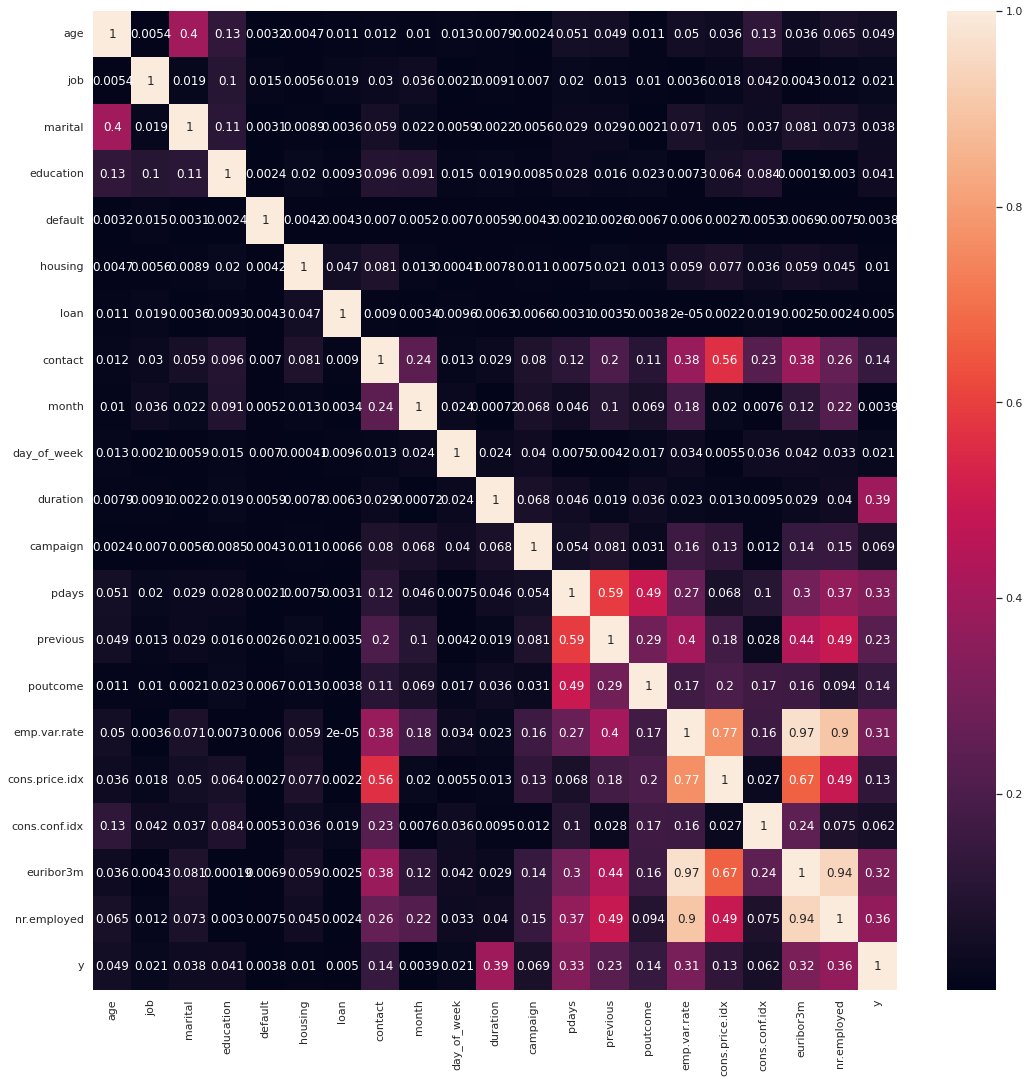

In [ ]:
plt.figure(figsize=(18,18))
map = sns.heatmap(bank_df.corr().abs(),annot=True)

## Test-Train Split

In [ ]:
X = bank_df.drop('y',axis=1)
y = bank_df[['y']]

K-Fold

In [ ]:
KF = KFold(n_splits=3,shuffle=True)
for train_index, test_index in KF.split(X):
    x_train, x_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
    y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]

In [ ]:
print("Train data shape:{}".format(x_train.shape))
print("Test data shape:{}".format(x_test.shape))

Train data shape:(20326, 20)
Test data shape:(10162, 20)


Scaling data

In [ ]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(x_train)
scaled_test = scaler.transform(x_test)

## kNN

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
pred = knn_model.predict(x_test)

In [ ]:
knnaccuracy = accuracy_score(y_test, pred)

In [ ]:
parameters = {"n_neighbors": range(1, 200, 4)}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 200, 4)})

In [ ]:
gridsearch.best_params_

{'n_neighbors': 197}

In [ ]:
knn_model_tuned = KNeighborsClassifier(n_neighbors=197)

In [ ]:
knn_model_tuned.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=197)

In [ ]:
pred = knn_model_tuned.predict(x_test)

In [ ]:
knntaccuracy = accuracy_score(y_test, pred)

## Support Vector Machine

SVM is another algorithm for classifying data. It tries to divide the data up using lines, sometimes straight linear lines and sometimes curved lines.

SVM tries to find the best lines - actually, a plane in multiple dimensions - to divide the data up into the known categories.

### Linear SVM

In [ ]:
#Create a svm Classifier
svmclf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svmclf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = svmclf.predict(x_test)

In [ ]:
# Model Accuracy
svmlaccuracy = metrics.accuracy_score(y_test, y_pred)
svmlaucscore = roc_auc_score(y_test, pred)
print("Overall AUC on validation: {:.3f}" .format(svmlaucscore))

Overall AUC on validation: 0.733


### Non linear SVM

In [ ]:
#Create a svm Classifier
svmclf = svm.SVC(kernel='rbf') # Non-Linear Kernel

#Train the model using the training sets
svmclf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = svmclf.predict(x_test)

In [ ]:
# Model Accuracy
svmnlaccuracy = metrics.accuracy_score(y_test, y_pred)
svmnlaucscore = roc_auc_score(y_test, pred)
print("Overall AUC on validation: {:.3f}" .format(svmnlaucscore))

Overall AUC on validation: 0.733


## Decision Tree Model

The Decision-Tree algorithm is one of the most frequently and widely used supervised machine learning algorithms that can be used for both classification and regression tasks.

The intuition behind the Decision-Tree algorithm is very simple to understand.

The Decision Tree algorithm intuition is as follows:-
For each attribute in the dataset, the Decision-Tree algorithm forms a node. The most important attribute is placed at the root node.

For evaluating the task in hand, we start at the root node and we work our way down the tree by following the corresponding node that meets our condition or decision.

This process continues until a leaf node is reached. It contains the prediction or the outcome of the Decision Tree.

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(scaled_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred = dt.predict(scaled_test)

In [ ]:
dtaccuracy = accuracy_score(y_test,pred)

In [ ]:
param_grid = {'criterion': ['gini', 'entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
              'splitter': ['best', 'random'], #splitting methodology; two supported strategies - default is best
              'max_depth': [2,4,6,8,10,None], #max depth tree can grow; default is none
              'min_samples_split': [2,5,10,.03,.05], #minimum subset size BEFORE new split (fraction is % of total); default is 2
              'min_samples_leaf': [1,5,10,.03,.05], #minimum subset size AFTER new split split (fraction is % of total); default is 1
              'max_features': [None, 'auto'], #max features to consider when performing split; default none or all
              'random_state': [0] #seed or control random number generator
             }

In [ ]:
tune_model = GridSearchCV(DecisionTreeClassifier(), 
                          param_grid=param_grid, 
                          scoring = 'roc_auc',
                          cv = 5,
                          verbose=0)
tune_model.fit(scaled_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, None],
                         'max_features': [None, 'auto'],
                         'min_samples_leaf': [1, 5, 10, 0.03, 0.05],
                         'min_samples_split': [2, 5, 10, 0.03, 0.05],
                         'random_state': [0], 'splitter': ['best', 'random']},
             scoring='roc_auc')

In [ ]:
print('\033[1m'+'Decision Tree Parameters:{} '.format(tune_model.best_params_))

Decision Tree Parameters:{'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0, 'splitter': 'best'} 


In [ ]:
dt_tuned =  DecisionTreeClassifier(criterion='entropy',
                                   min_samples_split=2,
                                   max_depth=2,
                                   max_features = 'auto',
                                   min_samples_leaf=1,
                                   random_state = 0,
                                   splitter='best')

dt_tuned.fit(scaled_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features='auto',
                       random_state=0)

In [ ]:
pred = dt_tuned.predict(scaled_test)

In [ ]:
dttaccuracy = accuracy_score(y_test,pred)

## Test-Train Split

In [ ]:
X = bank_df.drop('y',axis=1)
y = bank_df[['y']]

K-Fold

In [ ]:
KF = KFold(n_splits=3,shuffle=True)
for train_index, test_index in KF.split(X):
    x_train, x_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
    y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]

In [ ]:
print("Train data shape:{}".format(x_train.shape))
print("Test data shape:{}".format(x_test.shape))

Train data shape:(20326, 20)
Test data shape:(10162, 20)


Scaling data

In [ ]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(x_train)
scaled_test = scaler.transform(x_test)

## Random Forest

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
pred=clf.predict(x_test)

In [ ]:
rfaccuracy = metrics.accuracy_score(y_test, pred)

## Gradient Boosting

In [ ]:
gbclf = GradientBoostingClassifier()
gbclf.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
pred = gbclf.predict(x_test)

In [ ]:
gbaccuracy = metrics.accuracy_score(y_test, pred)

## Model Comparison

In [ ]:
from tabulate import tabulate
data = [['kNN', knnaccuracy],
['kNN with Grid Search', knntaccuracy],
['Support Vector Machine (Linear)', svmlaccuracy],
['Support Vector Machine (Non-Linear)', svmnlaccuracy],
['Decision Tree', dtaccuracy],
['Decision Tree with Grid Search', dttaccuracy],
['Random Forest', rfaccuracy],
['Gradient Boosting Ensemble', gbaccuracy],
]
print (tabulate(data, headers=["Machine Learning Model", "Classification Accuracy"]))

Machine Learning Model                 Classification Accuracy
-----------------------------------  -------------------------
kNN                                                   0.88949
kNN with Grid Search                                  0.90002
Support Vector Machine (Linear)                       0.894607
Support Vector Machine (Non-Linear)                   0.887325
Decision Tree                                         0.87965
Decision Tree with Grid Search                        0.875025
Random Forest                                         0.888506
Gradient Boosting Ensemble                            0.908089
